# Homework set 5

Before you turn this problem in, make sure everything runs as expected (in the menubar, select Kernel → Restart Kernel and Run All Cells...).

Please **submit this Jupyter notebook through Canvas** no later than **Mon Dec. 5, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

YOUR ANSWER HERE

# The global keyword (helpful info for exercise 2)
In exercise 2 you are asked, at some point, to count the number of times a certain function is evaluated. One way of doing this is using a global variable. To change a global variable x from inside a function, the global keyword is used.

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# to change a global variable x from inside a function, use the global keyword
def foo():
    global x
    x = x*2
    
x=4
print("x before:", x) 
foo()
print("x after:", x)

# verify for yourself that omitting the line "global x" produces an error

x before: 4
x after: 8


-----
# Exercise 1 (exercise 6.6(d), 2.5 pts)
**N.B. This is a pen-and-paper exercise. If you prefer you may upload a separate pdf for this exercise and other pen-and-paper exercises. If you do, don't put both files in a single .zip file, upload them both separately.**

Consider the minimization of 
$$
  f(x,y) = x^2 + y^2
$$
subject to
$$
  g(x,y) = xy^2 -1 = 0 .
$$
Determine the critical points of the Lagrangian function for this problem and determine whether each is a constrained minimum, a constrained maximum, or neither.

$$
L(x,y,\lambda)=f(x,y) - \lambda g(x,y)
$$
 \begin{align} \nabla L(x,y,\lambda) & = \begin{bmatrix} 2x - \lambda y^2 \\ 2y - 2xy\lambda \\ xy^2 -1 \end{bmatrix} =0\end{align}
 
$$
x = 1/2^{1/3}, y = -2^{1/6}, λ = 2^{1/3} \\ x = 1/2^{1/3}, y = 2^{1/6}, λ = 2^{1/3}
$$
 \begin{align} H(x,y,\lambda)=\begin{bmatrix} 2 & - \lambda 2y & y^2  \\ - \lambda 2y & 2 - \lambda 2x    & 2xy\\ y^2& 2xy &0 \end{bmatrix}\end{align}

 \begin{align} B(x,y,\lambda)=\begin{bmatrix} 2 & - \lambda 2y \\ - \lambda 2y & 2 - \lambda 2x   \end{bmatrix} \end{align}
\begin{align} \nabla Jg(x,y,\lambda) & = \begin{bmatrix} y^2 &  2xy \end{bmatrix} \end{align}
\begin{align} x = 1/2^{1/3}, y = 2^{1/6}, λ = 2^{1/3}  B(x,y,\lambda)=\begin{bmatrix} 2 & - 2^{3/2}\\ - 2^{3/2} & 0   \end{bmatrix}\end{align}  \begin{align} \nabla Jg(x,y,\lambda) & = \begin{bmatrix} 2^{1/3} &  2^{3/2} \end{bmatrix}\end{align}
$$
z^T \nabla Jg(x,y,\lambda)  = 0 \ and \ \|z\|_2=1
$$
$$
\begin{align} z=\begin{bmatrix} 0.212 \\-0.953\end{bmatrix} \end{align}
$$
$$
z^T B z = 1.23277621 \ =>\ minimum \ F(x*,y*)= 1/2^{2/3}+ 2^{1/3} = 1.88988
$$
$$
  \begin{align} x = 1/2^{1/3}, y = -2^{1/6}, λ = 2^{1/3}  B(x,y,\lambda)=\begin{bmatrix} 2 &  2^{3/2}\\  2^{3/2} & 0   \end{bmatrix}\end{align} \\ 
$$


$$
\begin{align} \nabla Jg(x,y,\lambda) & = \begin{bmatrix} 2^{1/3} &  -2^{3/2} \end{bmatrix}\end{align}
$$

$$
\begin{align} z=\begin{bmatrix} 0.212 \\0.953\end{bmatrix} \end{align}
$$
$$
z^T B z = 1.23277621 \ =>\ minimum \ F(x*,y*)= 1/2^{2/3}+ 2^{1/3} = 1.88988
$$



In [71]:
j=(1/(1+1+2**(13/3)))**0.5
print(j)
y=j*2**(13/6)
print(y)
z=np.array([0.212,-0.953])
zT=np.array([[0.212],[-0.953]])
B = np.array([[2,-2**(3/2)],[-2**(3/2),0]])

print(z@B@zT)


z=np.array([0.212,0.953])
zT=np.array([[0.212],[0.953]])
B = np.array([[2,2**(3/2)],[2**(3/2),0]])

print(z@B@zT)

print(0.5**(2/3)+2**(1/3))

0.212435699226281
0.9538040403502609
[1.23277621]
[1.23277621]
1.8898815748423097


---
# Exercise 2

## (a) (1 point)
The Rosenbrock function is given by

$$
f(x,y) = 100 (y-x^2)^2 + (1-x)^2
$$

What is the gradient of $f$? Show that there is exactly one local minimum point and determine this point (N.B. this is a pen-and-paper exercise.)

 \begin{align} \nabla f(x,y) & = \begin{bmatrix} 2 (200 x^3 - 200 x y + x - 1) \\ 200 (y - x^2) \end{bmatrix}=0
\end{align}
$$
y=x^2
\\x=1\\
y=1
$$

## (b) (2 points)
Implement the method of steepest descent. Use `scipy.optimize.line_search` as line search method.

Test your method on the Rosenbrock function starting from $(x,y) = (0,0)$.
Plot the convergence to the minimum: Make a plot of the convergence in the $(x,y)$ plane as well as plot of the norm of the error as a function of the step number.


Text(0, 0.5, 'Norm of the error')

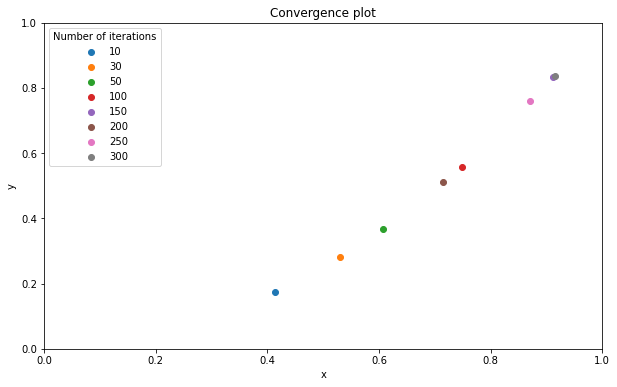

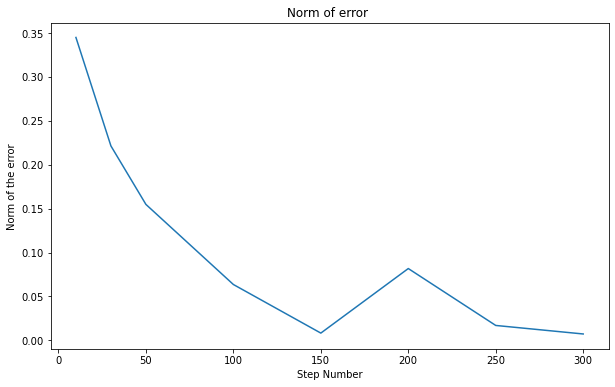

In [28]:
from scipy.optimize import line_search
from numpy.linalg import norm
def stepest_descent(f,grad,x0,y0,k):
    x = [x0,y0] 
    
    for i in range(k):
        alpha = line_search(f, grad, np.array(x), np.array([- grad(x)[0],- grad(x)[1]]))
        x[0] = x[0] - grad(x)[0]*alpha[0]
        x[1] = x[1] - grad(x)[1]*alpha[0]
    return x
def Rosenbrock(x):
    R = 100*(x[1] - x[0]**2)**2 + (1-x[0])**2
    return R
def Rosenbrock_grad(x):
    grad_x = 2*(200*x[0]**3 -200*x[0]*x[1] + x[0] -1)
    grad_y = 200*(x[1]-x[0]**2)
    return [grad_x, grad_y]
stepest_descent(Rosenbrock, Rosenbrock_grad,0,0,300)

max_k = [10,30, 50,100,150,200,250,300]
result= []
error = [] 
plt.figure(figsize=(10, 6))
for k in max_k:
    x,y = stepest_descent(Rosenbrock, Rosenbrock_grad,0,0,k)
    error = norm(Rosenbrock([x,y]))
    result.append([x,y,k,error])
    plt.scatter(result[len(result)-1][0], result[len(result)-1][1],label= f"{k}")
plt.ylim([0,1])
plt.xlim([0,1])
plt.title(label="Convergence plot")
plt.xlabel ('x')
plt.ylabel ('y')
plt.legend(title="Number of iterations")
result = np.array(result)

plt.figure(figsize=(10, 6))


plt.title(label="Norm of error")
plt.plot(result[:,2],result[:,3])
plt.xlabel('Step Number')
plt.ylabel('Norm of the error')





## (c) (1.5 points)

Implement the BFGS method for unconstrained optimization, given in Heath chapter 6. Test the correctness of the code using the data in Example 6.13.

In [ ]:
# YOUR CODE HERE

## (d) (1 points)

Apply your implementation of the BFGS method to find a local minimum of the Rosenbrock function (see previous exercise). Use starting point $(0,0)$ and do not assume any knowledge of the Hessian when you choose $B_0$.
Plot the convergence to the minimum.

In [ ]:
# YOUR CODE HERE

## (e) (1 point)
How does the convergence compare to that of gradient descent (see
previous question)? Let your program count the number of function and gradient evaluations and
consider this in your comparison. Implement a stopping criterion in both methods that runs until $||x_k-x^*||_2 < 10^{-5}$.

In [ ]:
# YOUR CODE HERE

YOUR ANSWER HERE